# Credit Card Transactions Fraud Detection

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of Credit Card Transactions Fraud Detection

### Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

### Importing dataset

In [2]:
train= pd.read_csv("Dataset/fraudTrain.csv")
test= pd.read_csv("Dataset/fraudTest.csv")

In [3]:
train.shape, test.shape

((1296675, 23), (555719, 23))

In [4]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
# First checking for null values

print(train.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [6]:
print(train.dtypes)

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [7]:
# amt column is removed because of zero variance 
train.drop(columns=['Unnamed: 0','first', 'last', 'street', 'city','trans_date_trans_time','trans_num','dob','amt'],inplace=True)
test.drop(columns=['Unnamed: 0','first', 'last', 'street', 'city','trans_date_trans_time','trans_num','dob','amt'],inplace=True)
train.head()

,cc_num,merchant,category,gender,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,F,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,M,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,MT,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,M,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0


In [8]:
encoder = LabelEncoder()
train["merchant"] = encoder.fit_transform(train["merchant"])
train["category"] = encoder.fit_transform(train["category"])
train["gender"] = encoder.fit_transform(train["gender"])
train["job"] = encoder.fit_transform(train["job"])
train["state"] = encoder.fit_transform(train["state"])
test["merchant"] = encoder.fit_transform(test["merchant"])
test["category"] = encoder.fit_transform(test["category"])
test["gender"] = encoder.fit_transform(test["gender"])
test["job"] = encoder.fit_transform(test["job"])
test["state"] = encoder.fit_transform(test["state"])

In [9]:
X = train.drop(['is_fraud'], axis=1)
y = train['is_fraud']
X1 = test.drop(['is_fraud'], axis=1)
y1 = test['is_fraud']

In [10]:
clf = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='auto'), {
    'C': [1,10,20],
}, cv=5, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
train_data1 = pd.DataFrame(clf.cv_results_)
train_data1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.437311,0.051797,0.032393,0.002400,1,{'C': 1},0.994212,0.994212,0.994212,0.994212,0.994208,0.994211,0.000002,1
1,1.274410,0.057668,0.025347,0.008274,10,{'C': 10},0.994212,0.994212,0.994212,0.994212,0.994208,0.994211,0.000002,1
2,1.248033,0.012293,0.022323,0.004162,20,{'C': 20},0.994212,0.994212,0.994212,0.994212,0.994208,0.994211,0.000002,1


In [11]:
from sklearn.metrics import accuracy_score
Model1=LogisticRegression(solver='liblinear', multi_class='auto',C=10)
Model1.fit(X, y)
y_pred = Model1.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score=[]
score.append(accuracy)
score

Accuracy: 0.9961401355721147


[0.9961401355721147]

In [12]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X:", X1.shape)
print("Shape of y:", y1.shape)

Shape of X: (1296675, 13)
Shape of y: (1296675,)
Shape of X: (555719, 13)
Shape of y: (555719,)


In [13]:
rs = RandomForestClassifier()
rs.fit(X,y)
y_pred = rs.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score.append(accuracy)
score

Accuracy: 0.994657371801216


[0.9961401355721147, 0.994657371801216]

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
rs = RandomForestClassifier()
rs.fit(X, y)
y_pred = rs.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score[1]=0.9938982397285364
score

Accuracy: 0.9951648225092178


[0.9961401355721147, 0.9938982397285364]

In [15]:
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), {
            'criterion': ['gini', 'entropy']
,
}, cv=10, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
train_data3 = pd.DataFrame(clf.cv_results_)
train_data3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,30.330128,1.184830,0.029911,0.007305,gini,{'criterion': 'gini'},0.006,0.506200,0.370076,0.743476,0.964270,0.985278,0.991833,0.944627,0.941604,0.006216,0.645958,0.379034,1
1,28.203886,1.248126,0.026049,0.004502,entropy,{'criterion': 'entropy'},0.006,0.417374,0.311719,0.661944,0.957916,0.979956,0.992774,0.966607,0.907185,0.037473,0.623895,0.379389,2


In [16]:
Dtree=tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter="best")
Dtree.fit(X, y)
y_pred = Dtree.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score.append(accuracy)

Accuracy: 0.9815068406874697


In [17]:
plt.rcParams["figure.figsize"] = (20,15)

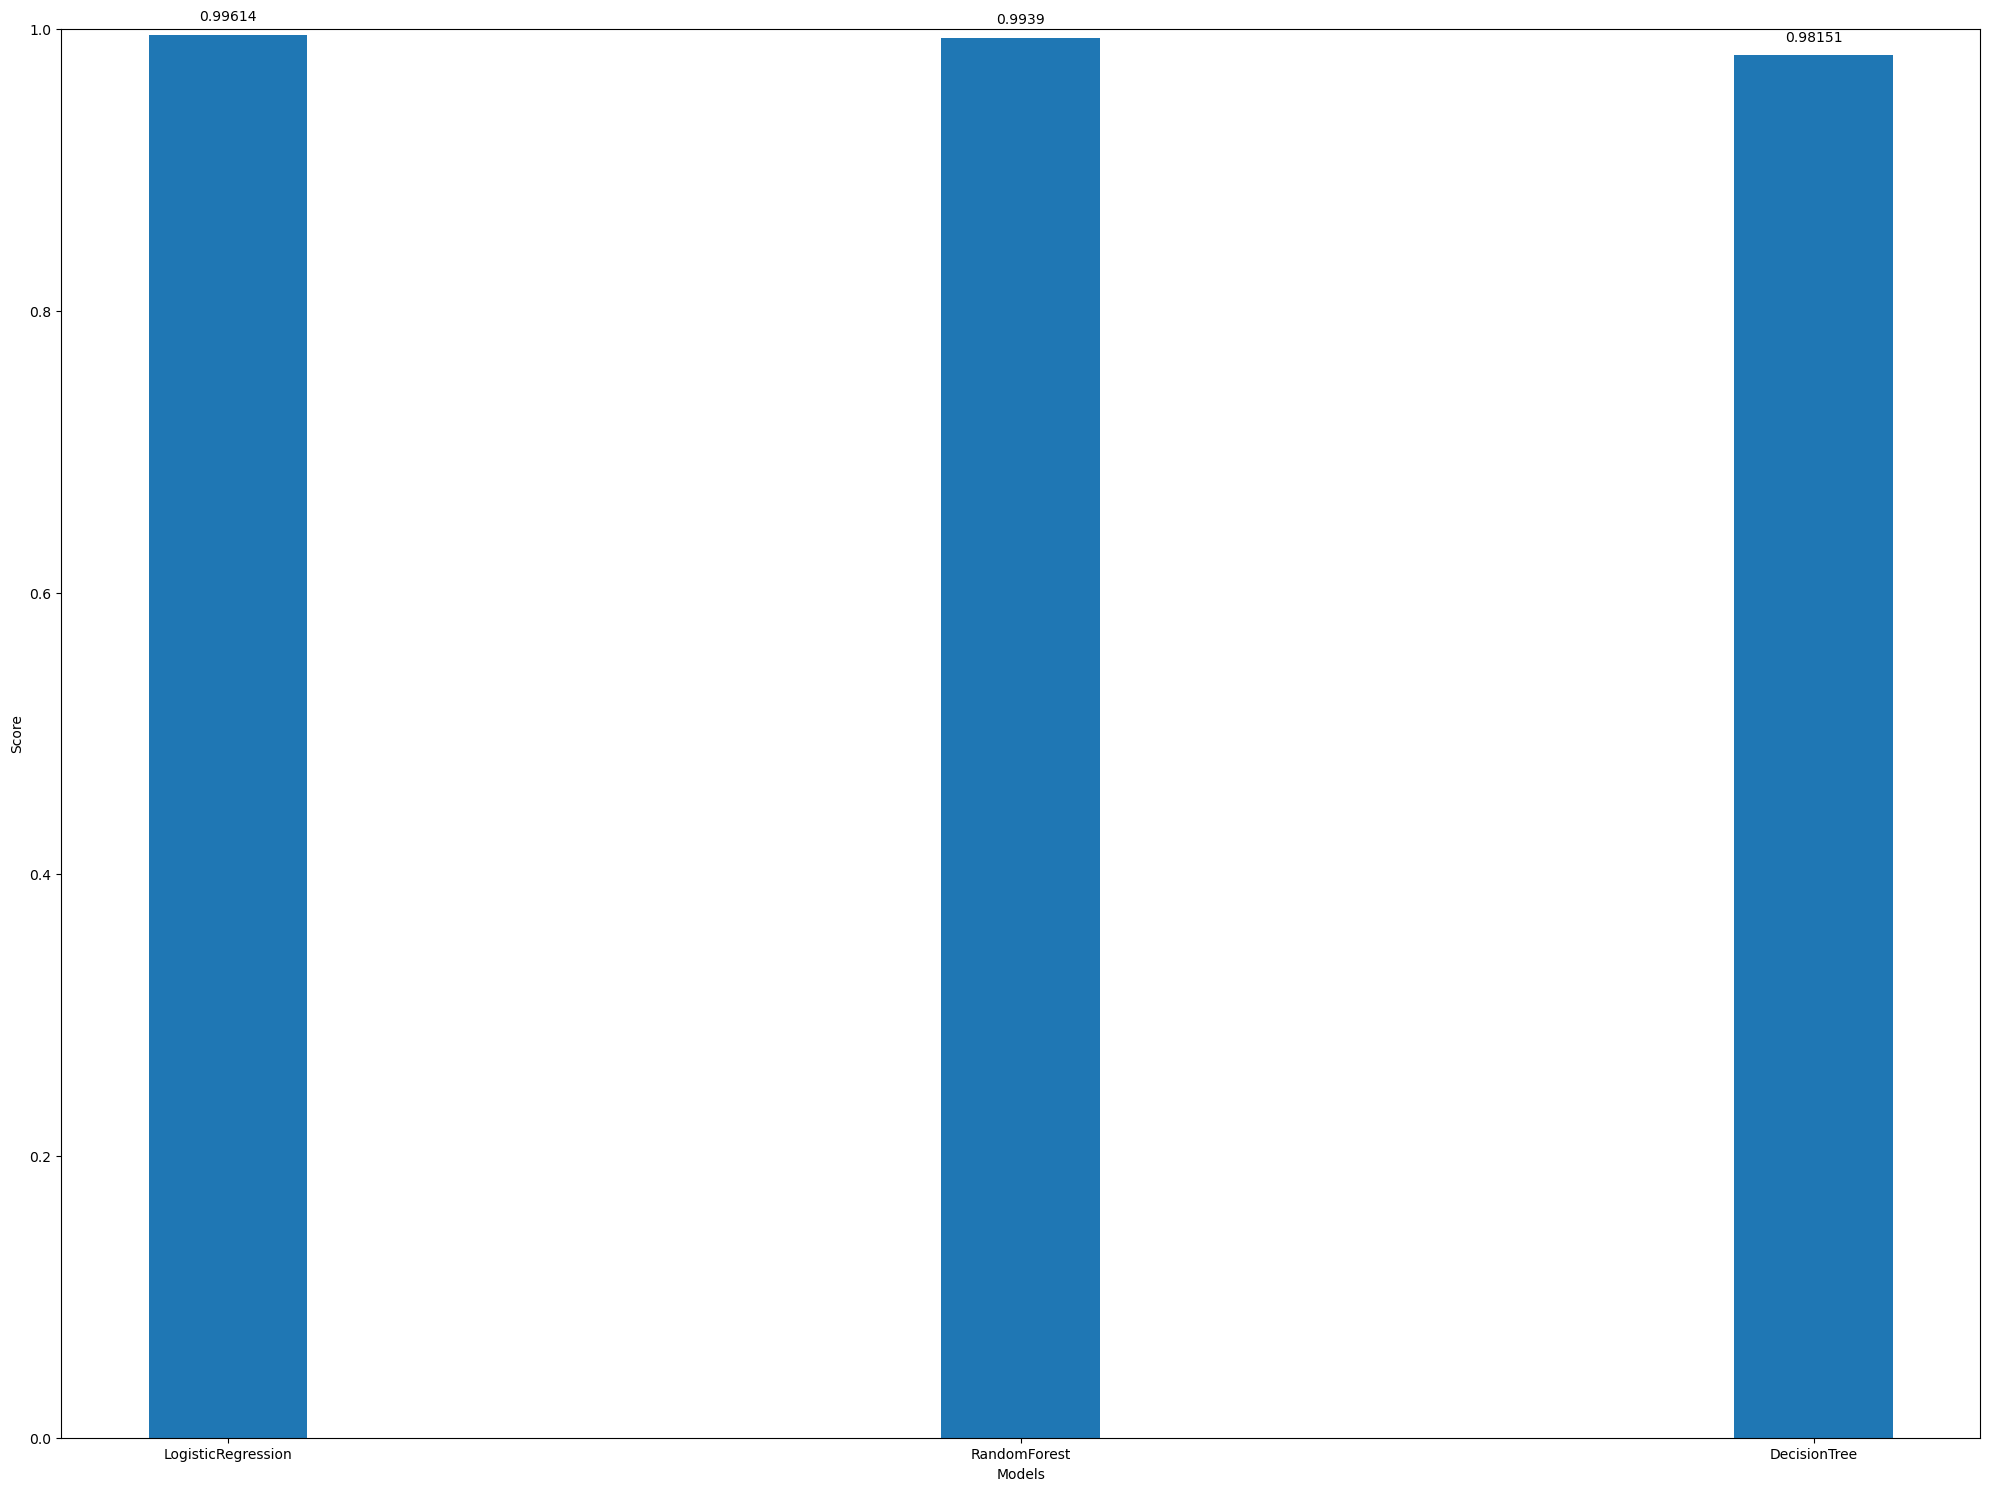

In [18]:
import matplotlib.pyplot as plt
import numpy as np

Models = ['LogisticRegression', 'RandomForest', 'DecisionTree']
y = score

fig, ax = plt.subplots()

x = np.arange(len(Models))

ax.bar(x, y, width=0.2)
ax.set_xticks(x)
ax.set_xticklabels(Models)
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_ylim(0, 1.0)  # Adjust the y-axis limit based on your data range

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.01 , s=str(round(value, 5)), ha='center')

plt.tight_layout()
plt.show()

In [19]:
for model, score in zip(Models, y):
    print(f"{model} Score: {score}")

LogisticRegression Score: 0.9961401355721147
RandomForest Score: 0.9938982397285364
DecisionTree Score: 0.9815068406874697
